In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [19]:
beta_x = 1.7
beta_y = 2.7

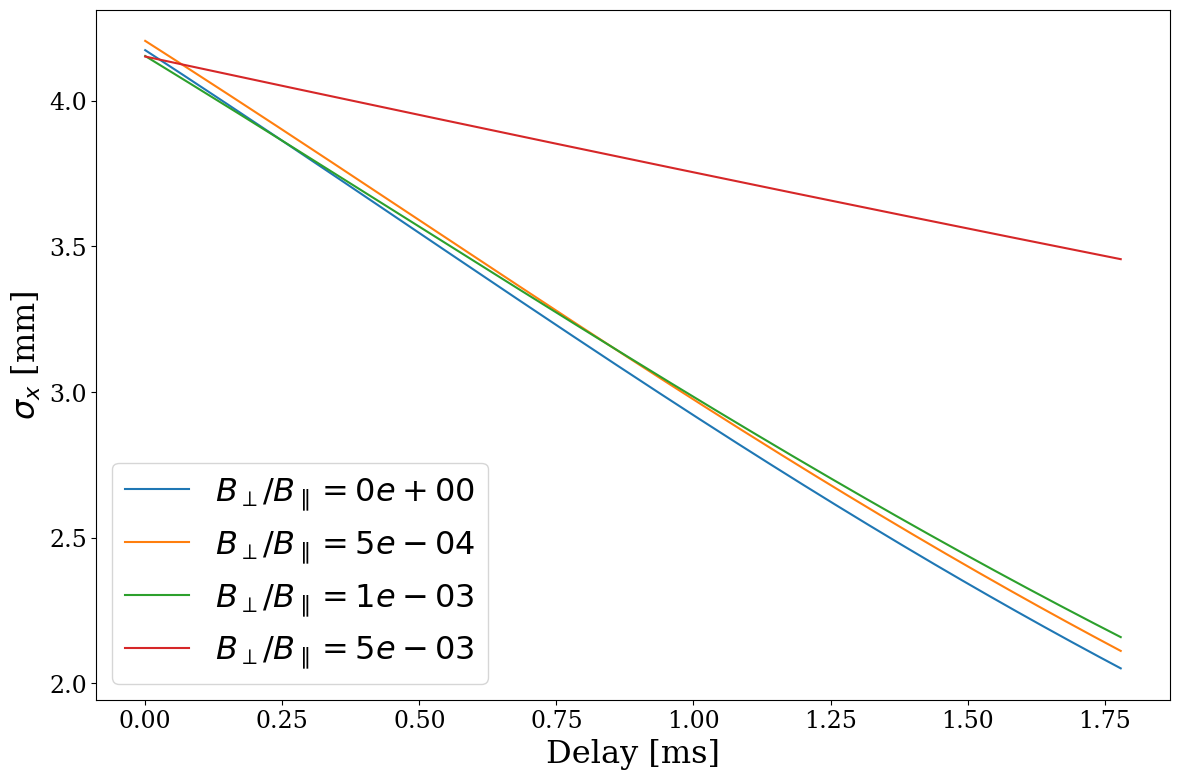

In [20]:

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

magnetic_field_ratio_list = [0,5e-4,1e-3,5e-3] #Iterate over different values of the magnetic field quality to see effect on cooling performance.


plt.figure(figsize=(12, 8))  # Create a figure for plotting
for i,magnetic_ratio in enumerate(magnetic_field_ratio_list):
    
    data = np.load(f'results/magnetic_field_imperfection/magnetic_ratio_{magnetic_ratio}.npz')
    # Extract data arrays
    time = data['time']
    norm_emittance_x = data['norm_emittance_x']
    geo_emittance_x = data['geo_emittance_x']
    norm_emittance_y = data['norm_emittance_y']
    geo_emittance_y = data['geo_emittance_y']
    
    sigma_x = np.sqrt(beta_x*geo_emittance_x)
    sigma_y = np.sqrt(beta_y*geo_emittance_y)

    # sigma_x_all_angles = np.array([np.sqrt(beta_x * geo_emittance_x) for angle in angle_list])
    # sigma_x_95 = np.percentile(sigma_x_all_angles, 95, axis=0)

   
    # Plot the standard deviation of x over time for the current angle
    plt.plot(time, sigma_x * 1e3, color=cycle[i],label=f'$B_\perp/B_\parallel={magnetic_ratio:.0e}$')

    
    #plt.errorbar(v_delay_unique,means_v,yerr=stds_v,label='vertical')
    plt.xlabel('Delay [ms]')
    plt.ylabel('$\sigma_x$ [mm]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/Magnetic_field_ratio.png', dpi=300)
plt.show()